In [1]:
import warnings
import matplotlib.pyplot as plt
from win32com.client.dynamic import Dispatch  
from datetime import datetime, timedelta
import time  
import pandas as pd
import seaborn as sns

In [2]:
PL = Dispatch("PISDK.PISDK")  
print("PISDK Version:", PL.PISDKVersion)  
  

PISDK Version: 1.4.2


In [3]:
for server in PL.Servers:      
    if server.Name == PL.Servers.DefaultServer.Name:      
        print("{0}\t**** Servidor principal ****:".format(server.Name))  
    else:      
        print(server.Name) 

BRTMRWVPI01VM
PI-VMFCAJDF	:: DEFAULT::


In [75]:
py_data= {
    'Tag Sinusoid' : 'SINUSOID'
}

  
for i,v in py_data.items():
    valores=[]
    time_stamp=[]
    pi_point = server.PIPoints[v]
 
    recorded_values = pi_point.Data.RecordedValues('*-4d','*',0,'',0,None)
    time.sleep(0.1) 

    
    for sample in recorded_values:
        if(str(type(sample.Value)) =="<class 'float'>"):
            valores.append(round(sample.Value,2))
            time_stamp_str=str(sample.TimeStamp.LocalDate)
            time_stamp.append(time_stamp_str[0:19])

    py_data[i] = (valores)
py_data['Tempo'] = time_stamp
df= pd.DataFrame(py_data, columns=['Tag Sinusoid','Tempo'])
df.set_index('Tempo').head()

,Tag Sinusoid
Tempo,
2020-03-13 10:40:52,18.15
2020-03-13 13:33:22,86.38
2020-03-13 14:37:22,99.03
2020-03-13 15:42:22,96.62
2020-03-13 16:56:22,76.36


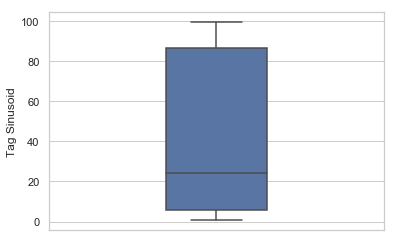

In [43]:

sns.set(style="whitegrid")
ax = sns.boxplot(y=df['Tag Sinusoid'],width=0.3)


In [70]:
td_max = timedelta(minutes=15)

py_data= {
    'Tag Sinusoid' : 'SINUSOID',
    'Tag Sinusoid pour hour' : 'Sinusoid(hora)',
    'Sinusoid 12 Hour' : 'SINUSOIDU'
    
    
}



df = pd.DataFrame()    
    
for j,v in py_data.items():
    valores=[]
    time_stamp=[]
    samplePoint = server.PIPoints[v]
    
    sampleAsynchStatus = Dispatch('PISDKCommon.PIAsynchStatus')
    sampleValues = samplePoint.Data.Summaries2('*-800d','*','24h',5,0,sampleAsynchStatus)
    t0 = datetime.now()
    while True:
        try:
            valsum = sampleValues("Average").Value 
            break  
        except: 
            td = datetime.now() - t0
            if td > td_max:
                print ("Aguarde...")
                exit(1)
            time.sleep(3)
    i = 1
    while i < valsum.Count+1:
        valores.append(valsum(i).Value)
        time_stamp_str=str(valsum(i).TimeStamp.LocalDate)
        time_stamp.append(time_stamp_str[0:10])
        i += 1
    df[j] = valores
    print(v)
    
df['TimeStamp'] = time_stamp    
    

SINUSOID
Sinusoid(hora)
SINUSOIDU


In [67]:
df.to_csv('caminho.csv')

In [74]:
df.describe()

,Tag Sinusoid,Tag Sinusoid pour hour,Sinusoid 12 Hour
count,8.000000e+02,800.000000,8.000000e+02
mean,-3.489227e+07,49.737800,-3.757630e+07
std,2.716547e+08,12.143264,2.817302e+08
min,-2.147220e+09,0.712411,-2.147220e+09
25%,4.999314e+01,38.379350,4.999316e+01
50%,4.999949e+01,50.072762,4.999767e+01
75%,5.000687e+01,61.490955,5.000687e+01
max,1.616000e+03,99.759270,9.189880e+01
